In [1]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
# Importação das dependencias

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [250]:
filename = 'table_values_csv.csv'
df = pd.read_csv(filename, sep=',',low_memory=False)
display(df.head())

,id_x,due_date,new_due_date,created_at,updated_at,number,value,nfe_number,nfe_series,kind_x,...,document_number,authorized_third_party_id,company_name,kind_y,paymaster_id,ballast_kind,invoice_number,payment_place,update_reason_kind,finished_at
0,b13369ca-e3de-451c-bfa0-2c2c06db00da,2023-08-05,2023-08-05,2023-07-12 13:38:12.047933,2023-07-12 13:38:12.061655,003123,0.01,523451,6,services,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,invoice,123123,São Paulo,others,NaN
1,c2f7a256-7165-4787-966e-e094344827d8,2024-03-23,2024-03-23,2024-02-07 19:34:32.485735,2024-02-07 19:34:32.485735,2,2014.09,000005010,001,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,BA,others,NaN
2,1bedeb72-2413-43ec-95a9-c6b539ce6a99,2024-01-17,2024-01-17,2023-12-20 13:22:01.374323,2023-12-20 13:22:01.374323,1,1047.74,000038412,001,goods,...,9.153087e+13,NaN,Gabeira-Mangueira,registration_participant,NaN,nfe_key,NaN,RN,NaN,NaN
3,ac2d5831-fdd6-44c5-8b07-01faa04dc451,2023-07-31,2023-07-31,2023-06-29 17:54:29.988490,2023-06-29 17:54:29.988490,3932,59.83,3932,1,goods,...,9.409448e+13,NaN,Cardoso LTDA,registration_participant,NaN,nfe_key,NaN,teste,operational_error,NaN
4,dacc7c5a-accb-430b-8d51-5aceb572e2c4,2033-08-05,2033-08-05,2024-02-07 18:56:32.251144,2024-02-07 18:56:32.256128,910304872,0.01,910304872,910304872,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,São Paulo,others,NaN


In [131]:
# Dropando colunas desnecessaria ou com muito nulos
df=df.drop(columns=['id_x', 'number', 'new_due_date', 'nfe_number', 'nfe_series', 'contact_phone_number_x', 'contact_phone_number_y', 'contact_phone_number', 'contact_email_x', 'finished_at', 'created_at_x', 'updated_at_x', 'new_due_date.1', 'contact_email_y', 'created_at_y', 'updated_at_y', 'invoice_number', 'authorized_third_party_id', 'paymaster_id', 'update_reason_kind' ], axis=1)

In [251]:
# Converter colunas de datas para o tipo datetime
df['due_date'] = pd.to_datetime(df['due_date'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181239 entries, 0 to 181238
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_x                       181239 non-null  object        
 1   due_date                   181239 non-null  datetime64[ns]
 2   new_due_date               181239 non-null  object        
 3   created_at                 181239 non-null  datetime64[ns]
 4   updated_at                 181239 non-null  datetime64[ns]
 5   number                     181239 non-null  object        
 6   value                      181239 non-null  float64       
 7   nfe_number                 180511 non-null  object        
 8   nfe_series                 180405 non-null  object        
 9   kind_x                     181239 non-null  object        
 10  state_x                    181239 non-null  object        
 11  payer_id                   181239 non-null  object  

In [252]:
# Remover linhas com valores nulos nas colunas específicas
df_cleaned = df.dropna(subset=['participant_id_x', 'name', 'state_y', 'document_number', 'company_name', 'kind_y'])
df = df_cleaned
df.isna().sum()

id_x                              0
due_date                          0
new_due_date                      0
created_at                        0
updated_at                        0
number                            0
value                             0
nfe_number                      726
nfe_series                      832
kind_x                            0
state_x                           0
payer_id                          0
name_x                            0
document_number_x                 0
contact_email_x               27265
contact_phone_number_x         8105
created_at_x                      0
updated_at_x                      0
type_x                            0
endorser_original_id              0
name_y                            0
document_number_y                 0
contact_email_y              176818
contact_phone_number_y         7567
created_at_y                      0
updated_at_y                      0
type_y                            0
new_due_date.1              

In [253]:
# Converter a coluna para inteiros
df['document_number_x'] = df['document_number_x'].astype(int)
df['document_number_y'] = df['document_number_y'].astype(int)
df['document_number'] = df['document_number'].astype(int)

In [254]:
# Agrupamento por payer_id
df_payer = df.groupby('document_number_x').agg(
    total_canceladas_payer=('state_x', lambda x: (x == 'canceled').sum()),
    total_ativas_payer=('state_x', lambda x: (x == 'active').sum()),
    total_finalizadas_payer=('state_x', lambda x: (x == 'finished').sum()),
    total_valor_payer=('value', 'sum')
).reset_index()
display(df_payer)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
0,49445260,0,6,0,985.98
1,81290101,0,1,0,2486.05
2,133816524,0,3,0,673.00
3,181509504,0,1,0,307.53
4,354250167,0,2,0,38360.00
...,...,...,...,...,...
9932,97837181005378,0,9,0,79603.20
9933,97837181005610,0,1,0,14196.00
9934,98047730000142,0,1,0,1999.99
9935,98102650000142,0,2,0,38906.88


In [9]:
#Top 1 canceladas
top_1_payer_c = df_payer.nlargest(1, 'total_canceladas_payer')
display(top_1_payer_c)

#Top 1 atrivas
top_1_payer_a = df_payer.nlargest(1, 'total_ativas_payer')
display(top_1_payer_a)

#Top 1 finalizadas
top_1_payer_f = df_payer.nlargest(1, 'total_finalizadas_payer')
display(top_1_payer_f)

#Top 1 valor
top_1_payer_v = df_payer.nlargest(1, 'total_valor_payer')
display(top_1_payer_v)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
16,1233353020,42371,109822,6,2802.36


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
16,1233353020,42371,109822,6,2802.36


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
155,11091007870,48,144,19,16075.97


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
8694,49208067000105,0,30,0,1.903632e+08


In [10]:
#Dropando o dado com mais casos
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_c['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_a['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_f['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_v['document_number_x'])]

top_1_payer_c = df_payer.nlargest(1, 'total_canceladas_payer')
top_1_payer_a = df_payer.nlargest(1, 'total_ativas_payer')
top_1_payer_f = df_payer.nlargest(1, 'total_finalizadas_payer')
top_1_payer_v = df_payer.nlargest(1, 'total_valor_payer')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
3407,10853114000138,48,4,0,299190.96


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
4512,16701716000156,0,303,0,3755499.08


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
1315,3813865000165,0,1,16,21440.93


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
4512,16701716000156,0,303,0,3755499.08


In [255]:
# Agrupar por endorser_original_id
df_endorser = df.groupby('document_number_y').agg(
    total_canceladas_endorser=('state_x', lambda x: (x == 'canceled').sum()),
    total_ativas_endorser=('state_x', lambda x: (x == 'active').sum()),
    total_finalizadas_endorser=('state_x', lambda x: (x == 'finished').sum()),
    total_valor_endorser=('value', 'sum')
).reset_index()
display(df_endorser)

,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
0,2796133001,0,0,1,150.00
1,9526874960,0,1,0,101.11
2,11091007870,1,2,2,900.08
3,11661181856,0,1,0,1500.00
4,13994932050,0,1,0,4560.00
...,...,...,...,...,...
615,93999391000180,0,0,1,1200.00
616,94043346000110,0,0,1,500.00
617,94476645000220,0,6,0,134387.00
618,95756110000194,0,21,0,235557.37


In [168]:
#Top 1 canceladas
top_1_endorser_c = df_endorser.nlargest(1, 'total_canceladas_endorser')
display(top_1_endorser_c)

#Top 1 atrivas
top_1_endorser_a = df_endorser.nlargest(1, 'total_ativas_endorser')
display(top_1_endorser_a)

#Top 1 finalizadas
top_1_endorser_f = df_endorser.nlargest(1, 'total_finalizadas_endorser')
display(top_1_endorser_f)

#Top 1 valor
top_1_endorser_v = df_endorser.nlargest(1, 'total_valor_endorser')
display(top_1_endorser_v)

,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
106,5570714000825,42371,109433,6,1936.77


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
106,5570714000825,42371,109433,6,1936.77


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
473,42236930000199,0,471,68,5478586.78


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
330,22682593000156,0,30,0,1.903632e+08


In [ ]:
#Dropando o dado com mais casos
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_c['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_a['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_f['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_v['document_number_y'])]

top_1_payer_c = df_endorser.nlargest(1, 'total_canceladas_endorser')
top_1_payer_a = df_endorser.nlargest(1, 'total_ativas_endorser')
top_1_payer_f = df_endorser.nlargest(1, 'total_finalizadas_endorser')
top_1_payer_v = df_endorser.nlargest(1, 'total_valor_endorser')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)

In [173]:
# Agrupar por endorser_original_id
df_participant = df.groupby('document_number').agg(
    total_canceladas_participant=('state_x', lambda x: (x == 'canceled').sum()),
    total_ativas_participant=('state_x', lambda x: (x == 'active').sum()),
    total_finalizadas_participant=('state_x', lambda x: (x == 'finished').sum()),
    total_valor_participant=('value', 'sum')
).reset_index()
display(df_participant)

,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
0,4676833000128,1,1,0,2.380000e+00
1,11261368000120,0,3795,1,1.348998e+07
2,12093804000161,0,4475,0,1.307045e+07
3,12254372000123,3,385,1,5.251592e+06
4,13942479000550,42592,109944,2,4.516305e+07
5,20628115000647,4,10,1,2.939240e+03
6,21053720000195,0,145,0,5.374691e+05
7,22945783000119,48,488,46,4.633309e+05
8,25247454000192,0,10,2,4.400000e-01
9,26405883000103,0,2,1,1.256550e+03


In [174]:
top_1_payer_c = df_participant.nlargest(1, 'total_canceladas_participant')
top_1_payer_a = df_participant.nlargest(1, 'total_ativas_participant')
top_1_payer_f = df_participant.nlargest(1, 'total_finalizadas_participant')
top_1_payer_v = df_participant.nlargest(1, 'total_valor_participant')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)

#Dropando o dado com mais casos
df_participant = df_participant[~df_participant['document_number'].isin(top_1_payer_c['document_number'])]
df_participant = df_participant[~df_participant['document_number'].isin(top_1_payer_a['document_number'])]
df_participant = df_participant[~df_participant['document_number'].isin(top_1_payer_f['document_number'])]
df_participant = df_participant[~df_participant['document_number'].isin(top_1_payer_v['document_number'])]

top_1_payer_c = df_participant.nlargest(1, 'total_canceladas_participant')
top_1_payer_a = df_participant.nlargest(1, 'total_ativas_participant')
top_1_payer_f = df_participant.nlargest(1, 'total_finalizadas_participant')
top_1_payer_v = df_participant.nlargest(1, 'total_valor_participant')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
4,13942479000550,42592,109944,2,45163053.67


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
4,13942479000550,42592,109944,2,45163053.67


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
10,26506898000168,0,2734,201,47879975.01


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
25,49326151000123,12,1604,7,1.681208e+08


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
11,28240255000140,331,906,0,12009949.27


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
2,12093804000161,0,4475,0,13070446.03


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
13,29109383000112,0,4295,69,9767852.75


,document_number,total_canceladas_participant,total_ativas_participant,total_finalizadas_participant,total_valor_participant
26,52953168000115,6,386,23,39796297.07


In [256]:
# Renomear colunas para manter consistência
df_payer = df_payer.rename(columns={'document_number_x': 'document_number', 'total_canceladas_payer': 'total_canceladas', 'total_ativas_payer': 'total_ativas', 'total_finalizadas_payer': 'total_finalizadas', 'total_valor_payer': 'total_valor'})
df_endorser = df_endorser.rename(columns={'document_number_y': 'document_number', 'total_canceladas_endorser': 'total_canceladas', 'total_ativas_endorser': 'total_ativas', 'total_finalizadas_endorser': 'total_finalizadas', 'total_valor_endorser': 'total_valor'})
df_participant = df_participant.rename(columns={'document_number': 'document_number', 'total_canceladas_participant': 'total_canceladas', 'total_ativas_participant': 'total_ativas', 'total_finalizadas_participant': 'total_finalizadas', 'total_valor_participant': 'total_valor'})

# Concatenar as tabelas
df_consolidado = pd.concat([df_payer, df_endorser], ignore_index=True)
display(df_consolidado)

,document_number,total_canceladas,total_ativas,total_finalizadas,total_valor
0,49445260,0,6,0,985.98
1,81290101,0,1,0,2486.05
2,133816524,0,3,0,673.00
3,181509504,0,1,0,307.53
4,354250167,0,2,0,38360.00
...,...,...,...,...,...
10552,93999391000180,0,0,1,1200.00
10553,94043346000110,0,0,1,500.00
10554,94476645000220,0,6,0,134387.00
10555,95756110000194,0,21,0,235557.37


C:\Users\julio.martins\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


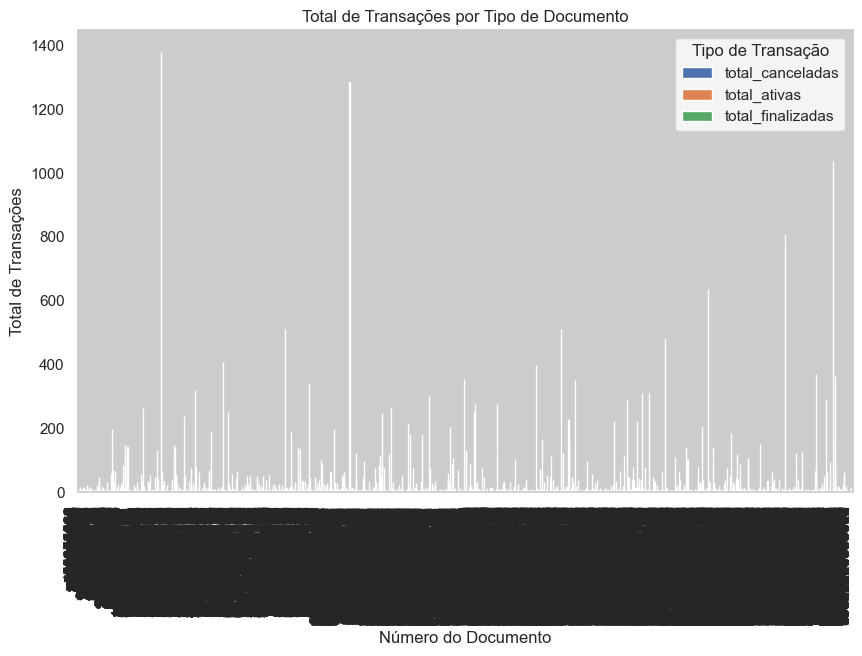

In [15]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Somar os totais por tipo
totais = df_consolidado.groupby(['document_number']).agg({
    'total_canceladas': 'sum',
    'total_ativas': 'sum',
    'total_finalizadas': 'sum'
}).reset_index()

# Plotar o gráfico
totais.plot(x='document_number', kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total de Transações por Tipo de Documento')
plt.xlabel('Número do Documento')
plt.ylabel('Total de Transações')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tipo de Transação')
plt.show()

In [257]:
df_media_desvio = df_consolidado

# Valor Normalizado
# Normalização do valor_total
scaler = StandardScaler()
df_media_desvio['valor_normalizado'] = scaler.fit_transform(df_media_desvio[['total_valor']])

# Valor Logarizado
# Aplicar a transformação logarítmica ao valor_total
df_media_desvio['valor_log'] = np.log1p(df_media_desvio['total_valor'])


# # Valor Categorico
# bins = [0, 1000, 10000, 50000, 100000, 1000000, np.inf]
# labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# df_media_desvio['total_valor_categoria'] = pd.cut(df_media_desvio['total_valor'], bins=bins, labels=labels)
# df_media_desvio['total_valor_categoria'] = df_media_desvio['total_valor_categoria'].astype(float)

# # SCORE Categorico
# df_media_desvio['score_category'] = (
#     (df_media_desvio['total_finalizadas'] * 0.7) +  # 70% finalizadas
#     (df_media_desvio['total_ativas'] * 0.05) +    # 1% ativas  
#     (df_media_desvio['total_valor_categoria'] * 0.25) - # 30% valor  total_valor_categoria
#     (df_media_desvio['total_canceladas'] * 0.5) # 50% canceladas
# )

# # Normalizando o score para uma escala percentual
# df_media_desvio['score_percentage_category'] = (
#     (df_media_desvio['score_category'] - df_media_desvio['score_category'].min()) /
#     (df_media_desvio['score_category'].max() - df_media_desvio['score_category'].min()) * 
#     100
# )


# # SCORE Normalizado
df_media_desvio['score_normalized'] = (
    (df_media_desvio['total_finalizadas'] * 0.9) +   # Peso 50% para finalizadas
    (df_media_desvio['total_ativas'] * 0.015) +       # Peso 5% para ativas
    (df_media_desvio['valor_normalizado'] * 0.80) -  # Peso 45% para valor normalizado
    (df_media_desvio['total_canceladas'] * 0.2)      # Peso 50% para canceladas
)
# Normalizando o score para uma escala percentual
df_media_desvio['score_percentage_normalized'] = (
    (df_media_desvio['score_normalized'] - df_media_desvio['score_normalized'].min()) /
    (df_media_desvio['score_normalized'].max() - df_media_desvio['score_normalized'].min()) * 
    100
)


# # SCORE Logarizado
df_media_desvio['score_log'] = (
    ((df_media_desvio['total_finalizadas']) +   # Peso 50% para finalizadas
    (df_media_desvio['total_ativas']) +       # Peso 5% para ativas
    (df_media_desvio['valor_log'])) -  # Peso 45% para valor normalizado
    (df_media_desvio['total_canceladas'])      # Peso 50% para canceladas
)

# # # SCORE Logarizado (utilizado atual)
# df_media_desvio['score_log'] = (
#     ((df_media_desvio['total_finalizadas'] * 0.77) +   # Peso 50% para finalizadas
#     (df_media_desvio['total_ativas'] * 0.015) +       # Peso 5% para ativas
#     (df_media_desvio['valor_log'] * 0.27)) -  # Peso 45% para valor normalizado
#     (df_media_desvio['total_canceladas'] * 0.10)      # Peso 50% para canceladas
# )

# Normalizando o score para uma escala percentual
df_media_desvio['score_percentage_log'] = (
    (df_media_desvio['score_log'] - df_media_desvio['score_log'].min()) /
    (df_media_desvio['score_log'].max() - df_media_desvio['score_log'].min())
)
df_media_desvio['score_percentage_log'] = df_media_desvio['score_percentage_log'] * 100

# display(df_media_desvio[['total_valor','valor_normalizado', 'score_normalized', 'score_percentage_normalized']])

display(df_media_desvio)


,document_number,total_canceladas,total_ativas,total_finalizadas,total_valor,valor_normalizado,valor_log,score_normalized,score_percentage_normalized,score_log,score_percentage_log
0,49445260,0,6,0,985.98,-0.028483,6.894650,0.067213,98.987496,12.894650,0.152571
1,81290101,0,1,0,2486.05,-0.027915,7.818853,-0.007332,98.986415,8.818853,0.146537
2,133816524,0,3,0,673.00,-0.028602,6.513230,0.022118,98.986842,9.513230,0.147565
3,181509504,0,1,0,307.53,-0.028740,5.731819,-0.007992,98.986406,6.731819,0.143448
4,354250167,0,2,0,38360.00,-0.014328,10.554797,0.018538,98.986790,12.554797,0.152068
...,...,...,...,...,...,...,...,...,...,...,...
10552,93999391000180,0,0,1,1200.00,-0.028402,7.090910,0.877278,98.999241,8.090910,0.145460
10553,94043346000110,0,0,1,500.00,-0.028667,6.216606,0.877066,98.999238,7.216606,0.144166
10554,94476645000220,0,6,0,134387.00,0.022043,11.808486,0.107634,98.988082,17.808486,0.159844
10555,95756110000194,0,21,0,235557.37,0.060361,12.369714,0.363289,98.991789,33.369714,0.182879


In [263]:

df_media_desvio['valor_log_norm'] = (
    (df_media_desvio['valor_log'] - df_media_desvio['valor_log'].min()) /
    (df_media_desvio['valor_log'].max() - df_media_desvio['valor_log'].min())
)

# Novo cálculo do score, com pesos ajustados para refletir as vantagens/desvantagens
df_media_desvio['score_log_teste'] = (
    ((df_media_desvio['total_finalizadas']) +   # Peso 50% para finalizadas (vantagem)
    (df_media_desvio['total_ativas'] * 0.05) +       # Peso 5% para ativas
    (df_media_desvio['valor_log'] * 0.40)) -
    (df_media_desvio['total_canceladas'] * 0.20)
)
df_media_desvio['score_log_teste'] = df_media_desvio['score_log_teste']

# Ajuste do score_log_teste para penalizar cancelamentos
df_media_desvio['score_log_teste'] = np.where(
    df_media_desvio['total_canceladas'] > 0,  # Condição
    df_media_desvio['score_log_teste'] * (df_media_desvio['total_canceladas'] * 0.05),  # Penaliza por cancelamentos
    df_media_desvio['score_log_teste']  # Mantém o score se não houver cancelamentos
)

df_media_desvio['score_log_percentual_teste'] = (
    (df_media_desvio['score_log_teste'] - df_media_desvio['score_log_teste'].min()) /
    (df_media_desvio['score_log_teste'].max() - df_media_desvio['score_log_teste'].min())
)
# # Transformando o valor em porcentagem
# df_media_desvio['score_log_percentual_teste'] = df_media_desvio['score_log_percentual_teste'] * 100

display(df_media_desvio[['valor_log_norm', 'valor_log', 'score_log_teste', 'score_log_percentual_teste']])
display(df_media_desvio)

,valor_log_norm,valor_log,score_log_teste,score_log_percentual_teste
0,0.361316,6.894650,3.057860,0.999985
1,0.409819,7.818853,3.177541,0.999985
2,0.341299,6.513230,2.755292,0.999985
3,0.300290,5.731819,2.342728,0.999985
4,0.553405,10.554797,4.321919,0.999985
...,...,...,...,...
10552,0.371616,7.090910,3.836364,0.999985
10553,0.325732,6.216606,3.486642,0.999985
10554,0.619200,11.808486,5.023395,0.999985
10555,0.648653,12.369714,5.997886,0.999986


,document_number,total_canceladas,total_ativas,total_finalizadas,total_valor,valor_normalizado,valor_log,score_normalized,score_percentage_normalized,score_log,score_percentage_log,valor_log_norm,score_log_teste,score_log_percentual_teste
0,49445260,0,6,0,985.98,-0.028483,6.894650,0.067213,98.987496,12.894650,0.152571,0.361316,3.057860,0.999985
1,81290101,0,1,0,2486.05,-0.027915,7.818853,-0.007332,98.986415,8.818853,0.146537,0.409819,3.177541,0.999985
2,133816524,0,3,0,673.00,-0.028602,6.513230,0.022118,98.986842,9.513230,0.147565,0.341299,2.755292,0.999985
3,181509504,0,1,0,307.53,-0.028740,5.731819,-0.007992,98.986406,6.731819,0.143448,0.300290,2.342728,0.999985
4,354250167,0,2,0,38360.00,-0.014328,10.554797,0.018538,98.986790,12.554797,0.152068,0.553405,4.321919,0.999985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,93999391000180,0,0,1,1200.00,-0.028402,7.090910,0.877278,98.999241,8.090910,0.145460,0.371616,3.836364,0.999985
10553,94043346000110,0,0,1,500.00,-0.028667,6.216606,0.877066,98.999238,7.216606,0.144166,0.325732,3.486642,0.999985
10554,94476645000220,0,6,0,134387.00,0.022043,11.808486,0.107634,98.988082,17.808486,0.159844,0.619200,5.023395,0.999985
10555,95756110000194,0,21,0,235557.37,0.060361,12.369714,0.363289,98.991789,33.369714,0.182879,0.648653,5.997886,0.999986


In [17]:
df_media_desvio=df_media_desvio.drop(columns=[ 'document_number'], axis=1)

In [264]:
# Regressão

# Definindo as variáveis preditoras (features) e a variável alvo (target)
X = df_media_desvio[['total_finalizadas', 'total_ativas', 'valor_log', 'total_canceladas']]
y = df_media_desvio['score_log_teste'] # score_percentage

# # Definindo as variáveis preditoras (features) e a variável alvo (target)
# X = df_media_desvio[['total_canceladas', 'total_ativas', 'total_finalizadas', 'valor_normalizado']]
# y = df_media_desvio['score_percentage_normalized'] # score_percentage

# Separar os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = tree_model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 2.209571017785919
R² Score: 0.824246235416383


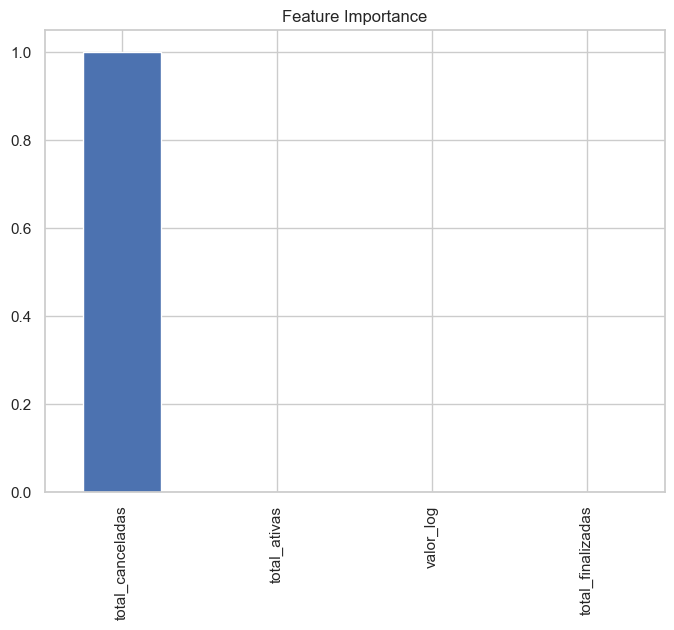

In [265]:
# Visualizando a importância das features
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.title('Feature Importance')
plt.show()

In [267]:
# Teste modelo arvore de decisão

# Efeitos comparativos do total_valor_categoria
# total_valor_categoria =   0.1 = [0, 1000], 
                #           0.2 = [1000, 10000], 
                #           0.3 = [10000, 50000], 
                #           0.4 = [50000, 100000], 
                #           0.5 = [100000, 1000000], 
                #           0.6 = [1000000, np.inf]

# Efeitos comparativos do score
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.5) +  
#     (df_media_desvio['total_ativas'] * 0.3) +       
#     (df_media_desvio['total_valor_categoria'] * 0.2) -
#     (df_media_desvio['total_canceladas'] * 0.5) 
# )

# # Normalizando o score para uma escala percentual
# df_media_desvio['score_percentage'] = (df_media_desvio['score'] - df_media_desvio['score'].min()) / (df_media_desvio['score'].max() - df_media_desvio['score'].min()) * 100



#Dados que chegam o modelo a 100%
new_data1 = {
    'total_finalizadas': [20],
    'total_ativas': [10000000],
    'valor_log': [1000000],
    'total_canceladas': [20]    
}

#Dados que chegam o modelo a 50%
new_data2 = {
    'total_canceladas': [0],
    'total_ativas': [0],
    'total_finalizadas': [0],
    'valor_log': [0]    
}

#Dados que chegam o modelo a 50%
new_data2 = {
    'total_canceladas': [0],
    'total_ativas': [0],
    'total_finalizadas': [0],
    'valor_log': [0]    
}

# Convertendo o dicionário para um DataFrame para o modelo fazer previsões
new_df = pd.DataFrame(new_data1)

# scaler = StandardScaler()
# new_df['valor_normalizado'] = scaler.fit_transform(new_df[['valor_normalizado']])

new_df['valor_log'] = np.log1p(new_df['valor_log'])

# Fazer a previsão do score para esses novos dados
predicted_score = tree_model.predict(new_df)

# Exibir a previsão
print(f'O score previsto para os novos dados é: {predicted_score[0]}')

O score previsto para os novos dados é: 74.13969242036488


In [21]:
#65.97113361991154


In [22]:
# Modelo Random Forest:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')

Random Forest - Mean Squared Error: 0.24581866270928082
Random Forest - R² Score: 0.9307428971237204


In [23]:
# Teste modelo Random Forest

# Efeitos comparativos do total_valor_categoria

# total_valor_categoria =   0.1 = [0, 1000], - 1.000
                #           0.2 = [1000, 10000], - 10.000
                #           0.3 = [10000, 50000], - 50.000
                #           0.4 = [50000, 100000], - 100.000
                #           0.5 = [100000, 1000000], - 1000.000
                #           0.6 = [1000000, np.inf] - infinito

# Efeitos comparativos do score
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.5) +  
#     (df_media_desvio['total_ativas'] * 0.1) +       
#     (df_media_desvio['total_valor_categoria'] * 0.3) -
#     (df_media_desvio['total_canceladas'] * 0.5) 
# )

# # Normalizando o score para uma escala percentual
# df_media_desvio['score_percentage'] = (df_media_desvio['score'] - df_media_desvio['score'].min()) / (df_media_desvio['score'].max() - df_media_desvio['score'].min()) * 100


new_data1 = {
    'total_canceladas': 0,
    'total_ativas': 2000,
    'total_finalizadas': 5000,
    'total_valor_categoria': 0.6
}

#Dados que chegam o modelo a 50%
new_data2 = {
    'total_canceladas': 10,
    'total_ativas': 1000,
    'total_finalizadas': 10,
    'valor_log': 10000000   
}

new_data_df = pd.DataFrame([new_data2])

# scaler = StandardScaler()
# new_df['valor_normalizado'] = scaler.fit_transform(new_df[['valor_normalizado']])

new_data_df['valor_log'] = np.log1p(df_media_desvio['valor_log'])

# Fazendo a previsão usando o modelo Random Forest
predicted_score = rf_model.predict(new_data_df)

print(f'Previsão do score para os dados fictícios: {predicted_score[0]}')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- valor_log
Feature names seen at fit time, yet now missing:
- total_valor_categoria
